

7.1.3.b, iteration 16, s = [0.000061035,0.000076294]



,y_act,t1,y1,y1',t2,y2,y2'
0,0.000000e+00,0.000000,0.000000e+00,0.000061,0.000000,0.000000e+00,0.000092
1,2.095476e-09,0.000031,2.793968e-09,0.000122,0.000046,6.286427e-09,0.000183
2,2.535525e-07,0.000336,1.331791e-07,0.000732,0.000504,2.996530e-07,0.001099
3,2.581802e-05,0.003387,1.168151e-05,0.006836,0.005081,2.628321e-05,0.010254
4,2.583151e-03,0.033905,1.150959e-03,0.067793,0.050858,2.587799e-03,0.101544
5,1.271947e-01,0.328055,1.022377e-01,0.592425,0.368291,1.272332e-01,0.648701
6,5.457359e-01,0.804339,4.989393e-01,0.976680,0.851985,5.457613e-01,0.987233
7,6.931472e-01,1.000000,6.931398e-01,0.999925,1.000000,6.931618e-01,0.999927


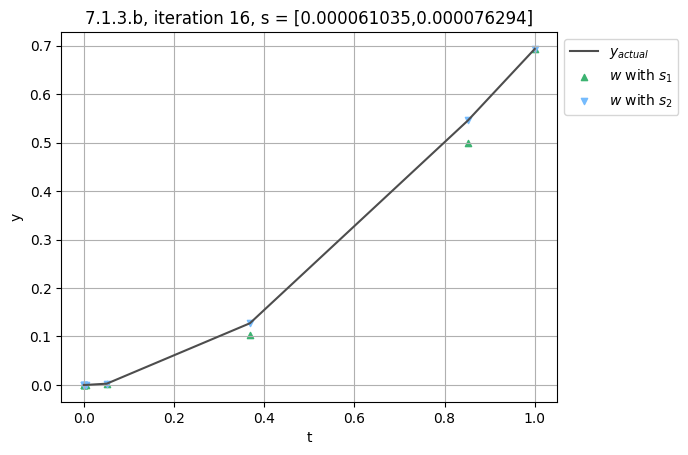

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

#7.1.3.b

# solution
yact = lambda t: np.log(pow(t,2)+1)

# bvp
bv = [0,np.log(2)]
ts = [0,1]

# ivp: f(t,y) = [y',y'']
def ydot(t,y):
  rc = np.zeros_like(y)
  rc[0] = y[1] # y'
  rc[1] = 18*np.exp(-2*y[0])*(1-pow(t,2)) # 7.1.c3b, bvp y''
  return rc

ic = np.array([0,bv[0]]) # zero is placeholder for s* - ie, [s*,bv[0]]
tol = 1e-5

# bisection sorry lol
s1 = -0.5
s2 = +0.5
imax = 20
i = 0
while (abs((s2-s1)/2) > tol) and (i<imax):
  ic = [bv[0],s1]
  sol1 = sp.integrate.solve_ivp(fun=ydot,t_span=ts,y0=ic)
  ic = [bv[0],s2]
  sol2 = sp.integrate.solve_ivp(ydot,ts,ic)

  size1 = sol1.t.size
  size2 = sol2.t.size
  err1 = bv[1] - sol1.y[0][size1-1]
  err2 = bv[1] - sol2.y[0][size2-1]
  if err1*err2 > 0 :
    print("choose different s1,s2")
    break
  #err = abs(err2 - err1) # deciding on root s stabilty over f(s)

  sc = (s1+s2)/2
  ic = [bv[0],sc]
  solc = sp.integrate.solve_ivp(fun=ydot,t_span=ts,y0=ic)
  sizec = solc.t.size
  errc = bv[1] - solc.y[0][sizec-1]
  if err1*errc < 0 :
    s2 = sc
  else:
    s1 = sc

  i += 1

# dataframe, save last brackets
ds = np.empty((max(size1,size2),1+3*2))
ds[:] = np.nan # matplotlib ignores nan = good
if size1 > size2:
  ds[0:size1,0] = yact(sol1.t)
  cx = "t1"
else:
  ds[0:size2,0] = yact(sol2.t)
  cx = "t2"
ds[0:size1,1] = sol1.t
ds[0:size1,2] = sol1.y[0]
ds[0:size1,3] = sol1.y[1]
ds[0:size2,4] = sol2.t
ds[0:size2,5] = sol2.y[0]
ds[0:size2,6] = sol2.y[1]

# dataframe, print some
s_title = "7.1.3.b, iteration " + str(i) + ", s = [" + "{:10.9f}".format(s1) +"," + "{:10.9f}".format(s2) + "]"
print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
pd.set_option("display.max_rows",10)
#pd.set_option("display.precision",4)
df = pd.DataFrame(data=ds,columns=["y_act","t1","y1","y1'","t2","y2","y2'"])
if True: # spreadsheet
  display(df)
  print() # spacer

# plot
if True: # plot
  ax1  = df.plot(x=cx,y="y_act",label="$y_{actual}$",color="0.3")
  ax12 = df.plot(x="t2",y="y1",label="$w$ with $s_1$",ax=ax1,color="mediumseagreen",marker="^",kind="scatter")
  ax11 = df.plot(x="t2",y="y2",label="$w$ with $s_2$",ax=ax1,color="xkcd:sky blue",marker="v",kind="scatter")
  ax1.set_title(s_title)
  ax1.set_xlabel("t")
  ax1.set_ylabel("y")
  #ax1.axis((.2,.8,1,2))
  ax1.grid('on',which='major',axis='x')
  ax1.grid('on',which='major',axis='y')

  plt.legend(bbox_to_anchor=(1,1))
  plt.show()

choose different s1,s2


7.1.3.b, iteration 0, s = [-0.500000000,0.500000000]



,y_act,t1,y1,y1',t2,y2,y2'
0,0.906094,1.000000,0.333333,-0.500000,1.000000,0.333333,0.500000
1,1.027338,1.063817,0.305259,-0.383268,1.063767,0.369567,0.641294
2,1.803295,1.357125,0.253060,0.001681,1.371976,0.753818,2.224603
3,2.543350,1.639035,0.302357,0.370311,1.576737,1.562336,6.752996
4,3.198821,1.953083,0.534134,1.278227,1.719412,3.268282,20.471809
...,...,...,...,...,...,...,...
6,4.144729,NaN,NaN,NaN,1.885994,14.279636,187.004724
7,4.453195,NaN,NaN,NaN,1.933106,29.850594,565.206824
8,4.678240,NaN,NaN,NaN,1.965691,62.401016,1708.305562
9,4.839729,NaN,NaN,NaN,1.988227,130.445652,5163.242060


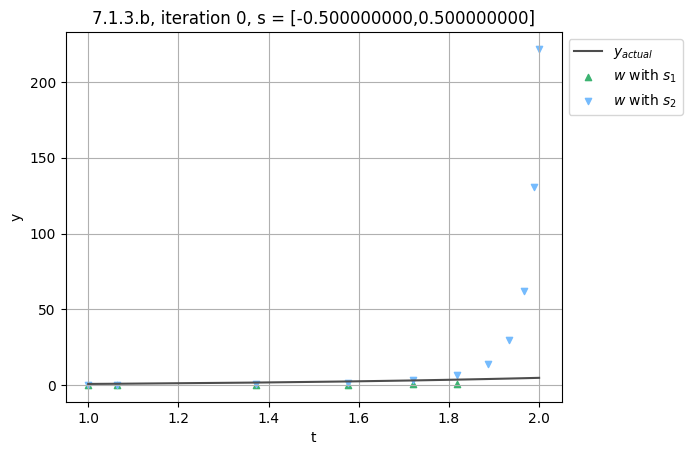

In [3]:
#7.1.3.a


# solution
yact = lambda t: t*np.exp(t)/3

# bvp
bv = [1/3,1/12]
ts = [1,2]

# ivp: f(t,y) = [y',y'']
def ydot(t,y):
  rc = np.zeros_like(y)
  rc[0] = y[1] # y'
  rc[1] = 18*y[0]**2 # 7.1.c3b, bvp y''
  return rc

ic = np.array([1,bv[0]]) # zero is placeholder for s* - ie, [s*,bv[0]]
tol = 1e-5

# bisection sorry lol
s1 = -0.5
s2 = +0.5
imax = 20
i = 0
while (abs((s2-s1)/2) > tol) and (i<imax):
  ic = [bv[0],s1]
  sol1 = sp.integrate.solve_ivp(fun=ydot,t_span=ts,y0=ic)
  ic = [bv[0],s2]
  sol2 = sp.integrate.solve_ivp(ydot,ts,ic)

  size1 = sol1.t.size
  size2 = sol2.t.size
  err1 = bv[1] - sol1.y[0][size1-1]
  err2 = bv[1] - sol2.y[0][size2-1]
  if err1*err2 > 0 :
    print("choose different s1,s2")
    break
  #err = abs(err2 - err1) # deciding on root s stabilty over f(s)

  sc = (s1+s2)/2
  ic = [bv[0],sc]
  solc = sp.integrate.solve_ivp(fun=ydot,t_span=ts,y0=ic)
  sizec = solc.t.size
  errc = bv[1] - solc.y[0][sizec-1]
  if err1*errc < 0 :
    s2 = sc
  else:
    s1 = sc

  i += 1

# dataframe, save last brackets
ds = np.empty((max(size1,size2),1+3*2))
ds[:] = np.nan # matplotlib ignores nan = good
if size1 > size2:
  ds[0:size1,0] = yact(sol1.t)
  cx = "t1"
else:
  ds[0:size2,0] = yact(sol2.t)
  cx = "t2"
ds[0:size1,1] = sol1.t
ds[0:size1,2] = sol1.y[0]
ds[0:size1,3] = sol1.y[1]
ds[0:size2,4] = sol2.t
ds[0:size2,5] = sol2.y[0]
ds[0:size2,6] = sol2.y[1]

# dataframe, print some
s_title = "7.1.3.b, iteration " + str(i) + ", s = [" + "{:10.9f}".format(s1) +"," + "{:10.9f}".format(s2) + "]"
print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
pd.set_option("display.max_rows",10)
#pd.set_option("display.precision",4)
df = pd.DataFrame(data=ds,columns=["y_act","t1","y1","y1'","t2","y2","y2'"])
if True: # spreadsheet
  display(df)
  print() # spacer

# plot
if True: # plot
  ax1  = df.plot(x=cx,y="y_act",label="$y_{actual}$",color="0.3")
  ax12 = df.plot(x="t2",y="y1",label="$w$ with $s_1$",ax=ax1,color="mediumseagreen",marker="^",kind="scatter")
  ax11 = df.plot(x="t2",y="y2",label="$w$ with $s_2$",ax=ax1,color="xkcd:sky blue",marker="v",kind="scatter")
  ax1.set_title(s_title)
  ax1.set_xlabel("t")
  ax1.set_ylabel("y")
  #ax1.axis((.2,.8,1,2))
  ax1.grid('on',which='major',axis='x')
  ax1.grid('on',which='major',axis='y')

  plt.legend(bbox_to_anchor=(1,1))
  plt.show()

iteration 0, error = 0.5547667697997086
iteration 1, error = 0.033566986375580324
iteration 2, error = 0.0006125569707043628
iteration 3, error = 7.342104458897065e-05


program 7.1 modified for question 7.2 q3b, interior points n =3



,t,y_act,w0,w1,w2,w3,w4
0,0.00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.25,0.10700,0.00000,0.06471,0.06124,0.06087,0.06083
2,0.50,0.27479,0.00000,0.24634,0.23268,0.23238,0.23233
3,0.75,0.52925,0.00000,0.49284,0.46238,0.46277,0.46274
4,1.00,0.90609,0.69315,0.69315,0.69315,0.69315,0.69315


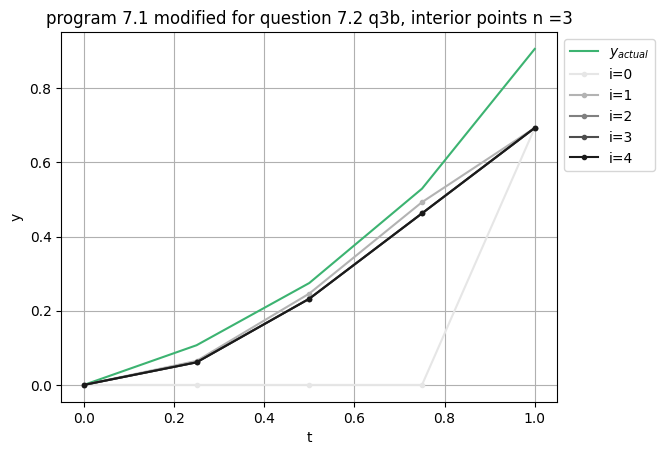

In [4]:
# gimme sec, only had handwritten

def f(w,t,bv,n):
  y = np.zeros((n,1)) # y=zeros(n,1) # excludes endpoints
  h = (t[1]-t[0])/(n+1)

  y[0]   = bv[0]  - 2*(w[0]   + pow(h,2)*(1-pow(t[0],2))/np.exp(2*w[0]))   + w[1]    # bc1 influence
  y[n-1] = w[n-2] - 2*(w[n-1] + pow(h,2)*(1-pow(t[1],2))/np.exp(2*w[n-1])) + bv[1]   # bc2 influence
  for i in range(1,n-1):
    th = t[0] + (i+1)*h
    y[i] = w[i-1] - 2*(w[i]   + pow(h,2)*(1-pow(th,2))/np.exp(2*w[i]))     + w[i+1]  # the rest

  return y # only intermediate

def jac(w,t,bv,n):
  a = np.zeros((n,n))
  h = (t[1]-t[0])/(n+1)

  # bvp, diagonal = partial = -2 + 2*(h^2)*(1-t^2)/exp(2w[i])
  for i in range(n): # i=1:n
    th = t[0] + i*h
    a[i,i] = -2 + 2*pow(h,2)*(1-pow(th,2))/np.exp(2*w[i])

  # bvp, off-diag = 1 (for this bvp)
  for i in range(n-1): # i=1:n-1
    a[i,i+1] = a[i+1,i] =1

  return a

# newton multivariate

t,bv = [0,1],[0,np.log(2)]
n = 3    # intermediate points
h = (t[1]-t[0])/(n+1)
imax = 4 # max iterations for multivariate

w = np.zeros((n,1)) # initial guess of zeros
s = np.zeros_like(w)

# datastore
ds = np.zeros((n+2,1+1+1*(imax+1)))    # t,y_act,w@(imax+1)
# datastore, ic
ds[0,:],ds[n+1,:] = bv[0],bv[1]      # w0, bv
ds[:,0] = np.linspace(t[0],t[1],n+2) # t # after ws wrt ds[0,0],ds[n+1,0]
ts = np.linspace(t[0],t[1],n+2)
ys = np.zeros_like(ts)
ys = yact(ts)
ds[:,1] = ys

for i in range(imax): # i=1:20 # lol its hardcode
  # w = w - w_n/w_d # newtons multivariate
  df = jac(w,t,bv,n)
  mf = -f(w,t,bv,n)
  s = np.linalg.solve(df,mf)
  print(f"iteration {i}, error = {np.linalg.norm(s)}")
  w += s
  ds[1:w.shape[0]+1,i+3] = w.flatten()

# dataframe from datastore
s_title = "program 7.1 modified for question 7.2 q3b, interior points n =" + str(n)
print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
pd.set_option("display.max_rows",10)
pd.set_option("display.precision",5)
df = pd.DataFrame(data=ds,columns=["t","y_act","w0","w1","w2","w3","w4"])
if True: # spreadsheet
  display(df)

if True: # plot
  print() # spacer
  ax1  = df.plot(x="t",y="y_act",label="$y_{actual}$",color="mediumseagreen")
  ax11 = df.plot(x="t",y="w0",label="i=0",ax=ax1,color=".9",marker=".")
  ax12 = df.plot(x="t",y="w1",label="i=1",ax=ax1,color=".7",marker=".")
  ax13 = df.plot(x="t",y="w2",label="i=2",ax=ax1,color=".5",marker=".")
  ax14 = df.plot(x="t",y="w3",label="i=3",ax=ax1,color=".3",marker=".")
  ax15 = df.plot(x="t",y="w4",label="i=4",ax=ax1,color=".1",marker=".")
  ax1.set_title(s_title)
  ax1.set_xlabel("t")
  ax1.set_ylabel("y")
  #ax1.axis((.6,1,3.5,4.5))
  ax1.grid('on',which='major',axis='x')
  ax1.grid('on',which='major',axis='y')

  plt.legend(bbox_to_anchor=(1,1))
  plt.show()

iteration 0, error = 0.9925941041309662
iteration 1, error = 28.56905284731025
iteration 2, error = 3.1890424549356347
iteration 3, error = 1.4489881733993648


program 7.1 modified for question 7.2 q3b, interior points n =3



,t,y_act,w0,w1,w2,w3,w4
0,1.00,0.90609,1.00000,1.00000,1.00000,1.00000,1.00000
1,1.25,1.45431,0.00000,0.77083,-16.09033,-15.51702,-15.30372
2,1.50,2.24084,0.00000,0.54167,-18.92654,-16.77205,-15.42441
3,1.75,3.35685,0.00000,0.31250,-12.05200,-14.33223,-14.82004
4,2.00,4.92604,0.08333,0.08333,0.08333,0.08333,0.08333


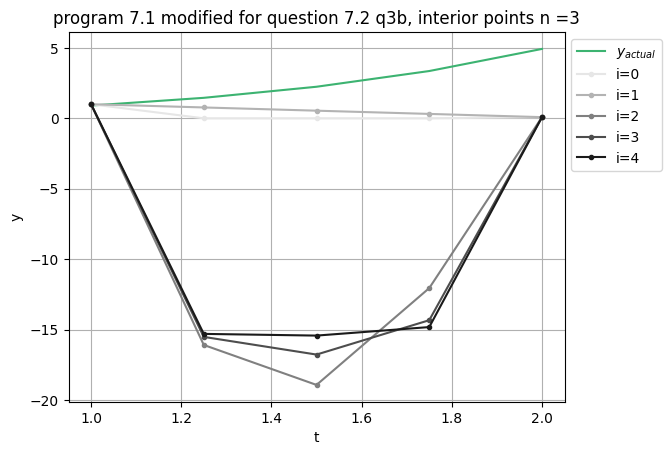

In [5]:
def f(w,t,bv,n):
  y = np.zeros((n,1)) # y=zeros(n,1) # excludes endpoints
  h = (t[1]-t[0])/(n+1)

  y[0]   = bv[0]  - 18*(w[0]   + pow(h,2)*(w[0]**2))   + w[1]    # bc1 influence
  y[n-1] = w[n-2] - 18*(w[n-1] + pow(h,2)*(w[n-1]**2)) + bv[1]   # bc2 influence

  for i in range(1,n-1):
    th = t[0] + (i+1)*h
    y[i] = w[i-1] - 18*(w[i]   + pow(h,2)*(w[i]**2))     + w[i+1]  # the rest

  return y # only intermediate

def jac(w,t,bv,n):
  a = np.zeros((n,n))
  h = (t[1]-t[0])/(n+1)

  # bvp, diagonal = partial = -2 + 2*(h^2)*(1-t^2)/exp(2w[i])
  for i in range(n): # i=1:n
    th = t[0] + i*h
    a[i,i] = -2 + 2*pow(h,2)*(w[i]**2)

  # bvp, off-diag = 1 (for this bvp)
  for i in range(n-1): # i=1:n-1
    a[i,i+1] = a[i+1,i] = 1

  return a

# newton multivariate

t,bv = [1,2],[1,1/12]
n = 3    # intermediate points
h = (t[1]-t[0])/(n+1)
imax = 4 # max iterations for multivariate

w = np.zeros((n,1)) # initial guess of zeros
s = np.zeros_like(w)

# datastore
ds = np.zeros((n+2,1+1+1*(imax+1)))    # t,y_act,w@(imax+1)
# datastore, ic
ds[0,:],ds[n+1,:] = bv[0],bv[1]      # w0, bv
ds[:,0] = np.linspace(t[0],t[1],n+2) # t # after ws wrt ds[0,0],ds[n+1,0]
ts = np.linspace(t[0],t[1],n+2)
ys = np.zeros_like(ts)
ys = yact(ts)
ds[:,1] = ys

for i in range(imax): # i=1:20 # lol its hardcode
  # w = w - w_n/w_d # newtons multivariate
  df = jac(w,t,bv,n)
  mf = -f(w,t,bv,n)
  s = np.linalg.solve(df,mf)
  print(f"iteration {i}, error = {np.linalg.norm(s)}")
  w += s
  ds[1:w.shape[0]+1,i+3] = w.flatten()

# dataframe from datastore
s_title = "program 7.1 modified for question 7.2 q3b, interior points n =" + str(n)
print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
pd.set_option("display.max_rows",10)
pd.set_option("display.precision",5)
df = pd.DataFrame(data=ds,columns=["t","y_act","w0","w1","w2","w3","w4"])
if True: # spreadsheet
  display(df)

if True: # plot
  print() # spacer
  ax1  = df.plot(x="t",y="y_act",label="$y_{actual}$",color="mediumseagreen")
  ax11 = df.plot(x="t",y="w0",label="i=0",ax=ax1,color=".9",marker=".")
  ax12 = df.plot(x="t",y="w1",label="i=1",ax=ax1,color=".7",marker=".")
  ax13 = df.plot(x="t",y="w2",label="i=2",ax=ax1,color=".5",marker=".")
  ax14 = df.plot(x="t",y="w3",label="i=3",ax=ax1,color=".3",marker=".")
  ax15 = df.plot(x="t",y="w4",label="i=4",ax=ax1,color=".1",marker=".")
  ax1.set_title(s_title)
  ax1.set_xlabel("t")
  ax1.set_ylabel("y")
  #ax1.axis((.6,1,3.5,4.5))
  ax1.grid('on',which='major',axis='x')
  ax1.grid('on',which='major',axis='y')

  plt.legend(bbox_to_anchor=(1,1))
  plt.show()